# Simple Linear Regression (SLR)
Simple Linear Regression uses a best-fit line to make predictions.

### Formula
```y = b0 + b1*x```
- y is the dependent variable
- b1 is the slope (rate of change)
- x is the independent variable
- b0 is the y-intercept of the line

# Example of Simple Linear Regression
<img src="images/slr/slr_example.png" height="50%" width="50%"></img>

The line above is the best-fit line using the data set and the linear regression formula.
- y is the Salary
- b1 is the slope (rate of change) in salary based on experience of the employee
- x is the Experience of the Employee
- b0 is the base point, where x (experience of employee) is equal to 0

# Ordinary Least Squares
A simple linear regression's best-fit line is determined by the "Ordinary Least Squares" method.

<img src="images/slr/slr_ols.png" height="50%" width="50%"></img>
- point ```yi``` indicates the actual point in the data set
- point ```yi^``` indicates the predicted point in the data set


The best-fit line has the least squared sum distances between ```yi``` and ```yi^```.
- Multiple lines can be created, but the best-fit is the line with the least squared distances

# SKLearn Linear Regression Model

In [2]:
# import libraries
import numpy as np
import pandas as pd

In [4]:
# import the data set
salary_df = pd.read_csv("datasets/salary_data.csv")

salary_df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [32]:
# x is the experience column (represented as a 2D Array for the SKLearn regression model)
x = salary_df.iloc[:, :-1].values

# y is the salary column (represented as a 1D Array for the SKLearn regression model)
y = salary_df.iloc[:, 1].values

In [26]:
# split the data set into training and testing data sets
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

In [27]:
# import the linear regression class
from sklearn.linear_model import LinearRegression

# create a linear regressor Object, then fit it to the training data
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
# predict the test set results
y_pred = regressor.predict(x_test)

y_pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

In [29]:
# compare y_pred (prediction) to the y_test (actual)
i = 0
while i < len(y_pred):
    diff = abs(round(y_pred[i]) - y_test[i])
    print("Predicted: " + str(round(y_pred[i])) + " vs Actual: " + str(y_test[i]) +
          " ---> Difference: " + str(diff))
    i += 1

Predicted: 40835.0 vs Actual: 37731.0 ---> Difference: 3104.0
Predicted: 123079.0 vs Actual: 122391.0 ---> Difference: 688.0
Predicted: 65135.0 vs Actual: 57081.0 ---> Difference: 8054.0
Predicted: 63265.0 vs Actual: 63218.0 ---> Difference: 47.0
Predicted: 115603.0 vs Actual: 116969.0 ---> Difference: 1366.0
Predicted: 108126.0 vs Actual: 109431.0 ---> Difference: 1305.0
Predicted: 116537.0 vs Actual: 112635.0 ---> Difference: 3902.0
Predicted: 64200.0 vs Actual: 55794.0 ---> Difference: 8406.0
Predicted: 76350.0 vs Actual: 83088.0 ---> Difference: 6738.0
Predicted: 100649.0 vs Actual: 101302.0 ---> Difference: 653.0


# Visualizing Results
Based on the visualizations, I would say the linear regression model is accurate.

In [30]:
# import libraries
import matplotlib.pyplot as plt

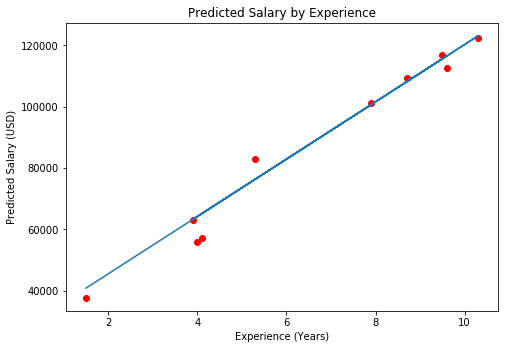

In [31]:
# create a figure with evenly-spaced axes
figure = plt.figure()
axes = figure.add_axes([1, 1, 1, 1])

# set labels
axes.set_xlabel("Experience (Years)")
axes.set_ylabel("Predicted Salary (USD)")
axes.set_title("Predicted Salary by Experience")

# scatter plot the actual salary
axes.scatter(x_test, y_test, color="red")

# line plot the predicted salary
axes.plot(x_test, y_pred)